# Importing Libraries

In [1]:
import numpy as np

import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline
# !pip install triceratops
import triceratops.triceratops as tr

/home/cminds/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

In [2]:
ID = 114018671
sectors = np.array([34,61])
 
period = 2.470494756
tdepth = 0.00021500961606371846


lc_file = "TOI_1011_combined_data_triceratops.csv"
contrastcurve_file = "TOI_1011_562nm.csv"

band = 'Vis'

# Downloading & Visualizing Data

In [3]:
target = tr.target(ID=ID, sectors=sectors)

Sector 34


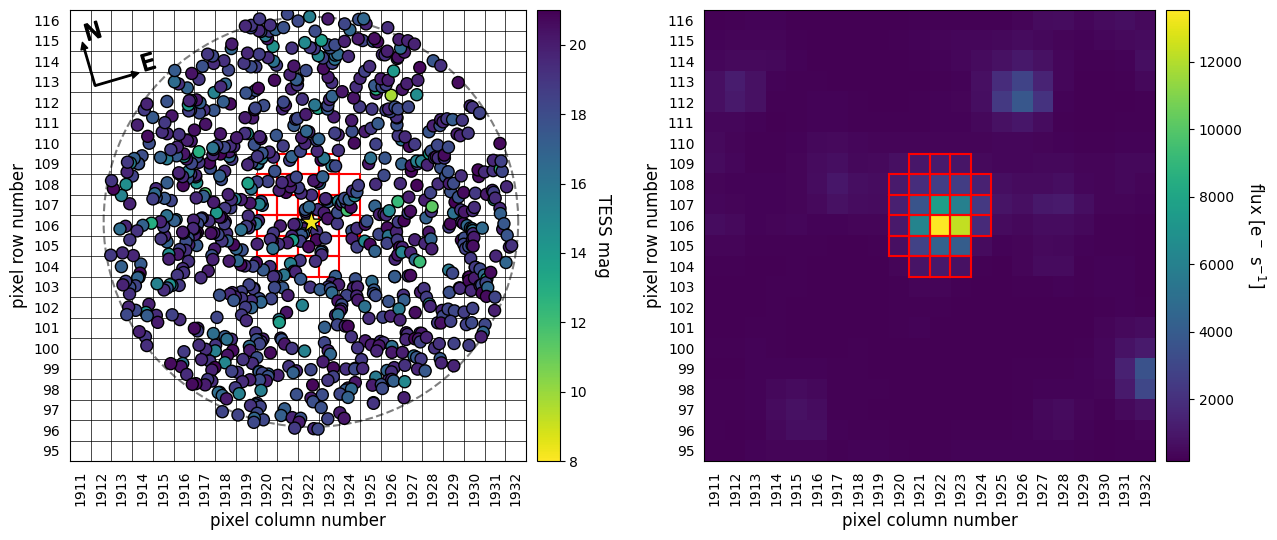

Sector 61


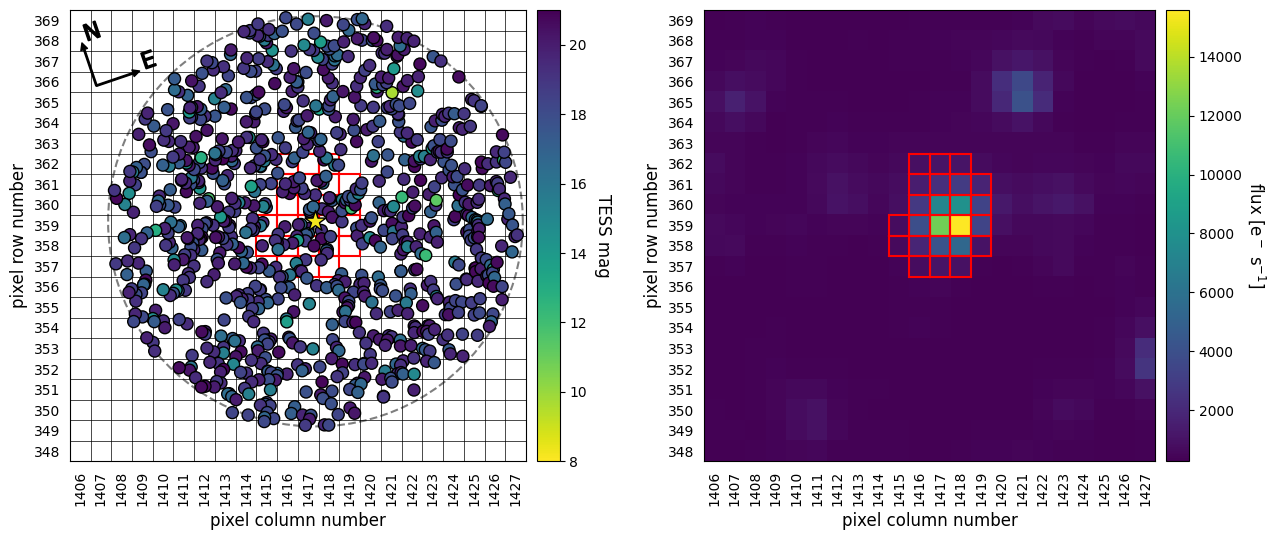

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,114018671,8.2388,7.594,7.247,7.109,113.984017,-32.841418,0.94,0.941335,5413.68,18.975300,0.000,0.000
1,774050394,19.0297,NaN,NaN,NaN,113.983386,-32.839261,NaN,NaN,NaN,-0.011883,7.998,346.173
2,774050395,19.9192,NaN,NaN,NaN,113.980957,-32.842500,NaN,NaN,NaN,2.482790,10.043,247.168
3,774050411,19.0857,NaN,NaN,NaN,113.984874,-32.844345,NaN,NaN,NaN,NaN,10.852,166.182
4,774050391,19.0083,NaN,NaN,NaN,113.983313,-32.838313,NaN,NaN,NaN,-0.540633,11.381,349.207
...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,774050793,19.0062,NaN,NaN,NaN,113.925753,-32.814159,NaN,NaN,NaN,4.498680,201.734,299.092
890,114189434,16.7702,16.074,16.057,15.568,114.027373,-32.884031,2.18,1.408320,8708.00,0.143347,201.796,139.494
891,774050890,18.8150,NaN,NaN,NaN,113.987078,-32.785422,1.08,0.730740,5912.00,0.092312,201.797,2.630
892,114018649,18.1540,16.480,16.049,15.646,113.917894,-32.849536,NaN,NaN,NaN,NaN,202.115,261.668


In [4]:
ap34 = np.array([
[1921, 104],[1922, 104],[1923, 104],[1920, 105],[1921, 105],[1922, 105],
[1923, 105],[1920, 106],[1921, 106],[1922, 106],[1923, 106],[1924, 106],
[1920, 107],[1921, 107],[1922, 107],[1923, 107],[1924, 107],[1920, 108],
[1921, 108],[1922, 108],[1923, 108],[1924, 108],[1921, 109],[1922, 109],
[1923, 109]])

ap61= np.array([[1416,  357],
[1417, 357],[1418, 357],[1415, 358],[1416, 358],[1417, 358],[1418, 358],
[1419, 358],[1415, 359],[1416, 359],[1417, 359],[1418, 359],[1419, 359],
[1416, 360],[1417, 360],[1418, 360],[1419, 360],[1416, 361],[1417, 361],
[1418, 361],[1419, 361],[1416, 362],[1417, 362],[1418, 362]])

apertures = np.array([ap34, ap61], dtype = object)

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

# Check Nearby Region

In [5]:
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,114018671,8.2388,7.594,7.247,7.109,113.984017,-32.841418,0.94,0.941335,5413.68,18.975300,0.000,0.000,9.541307e-01,0.000225
1,774050394,19.0297,NaN,NaN,NaN,113.983386,-32.839261,NaN,NaN,NaN,-0.011883,7.998,346.173,4.608207e-05,0.000000
2,774050395,19.9192,NaN,NaN,NaN,113.980957,-32.842500,NaN,NaN,NaN,2.482790,10.043,247.168,2.027551e-05,0.000000
3,774050411,19.0857,NaN,NaN,NaN,113.984874,-32.844345,NaN,NaN,NaN,NaN,10.852,166.182,4.303165e-05,0.000000
4,774050391,19.0083,NaN,NaN,NaN,113.983313,-32.838313,NaN,NaN,NaN,-0.540633,11.381,349.207,4.693521e-05,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,774050793,19.0062,NaN,NaN,NaN,113.925753,-32.814159,NaN,NaN,NaN,4.498680,201.734,299.092,1.358556e-25,0.000000
890,114189434,16.7702,16.074,16.057,15.568,114.027373,-32.884031,2.18,1.408320,8708.00,0.143347,201.796,139.494,3.084608e-26,0.000000
891,774050890,18.8150,NaN,NaN,NaN,113.987078,-32.785422,1.08,0.730740,5912.00,0.092312,201.797,2.630,5.895128e-23,0.000000
892,114018649,18.1540,16.480,16.049,15.646,113.917894,-32.849536,NaN,NaN,NaN,NaN,202.115,261.668,9.836468e-25,0.000000


In [8]:
for i in range (1, np.size(target.stars['ID'])):
    if target.stars['tdepth'][i] !=0:
        print(i, target.stars['ID'][i])

5 774050406
6 114018662
8 774050390
9 774050407
19 114018660
30 774050408
31 114018679
36 114018670
37 114018700
56 114018647
57 114018706
58 114018658
62 114018680
72 114018699
73 114018687
76 114018644
78 114018638
79 114018712
89 114018727
123 114018726


In [9]:
target.stars['tdepth'][5] = 0
target.stars['tdepth'][6] = 0
target.stars['tdepth'][8] = 0
target.stars['tdepth'][9] = 0
target.stars['tdepth'][19] = 0
target.stars['tdepth'][30] = 0
target.stars['tdepth'][31] = 0
target.stars['tdepth'][36] = 0
target.stars['tdepth'][37] = 0
target.stars['tdepth'][56] = 0
target.stars['tdepth'][57] = 0
target.stars['tdepth'][58] = 0
target.stars['tdepth'][62] = 0
target.stars['tdepth'][72] = 0
target.stars['tdepth'][73] = 0
target.stars['tdepth'][76] = 0
target.stars['tdepth'][78] = 0
target.stars['tdepth'][79] = 0
target.stars['tdepth'][89] = 0
target.stars['tdepth'][123] = 0
# target.stars['tdepth'][224] = 0


/tmp/ipykernel_1730584/3821019952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.stars['tdepth'][5] = 0
/tmp/ipykernel_1730584/3821019952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.stars['tdepth'][6] = 0
/tmp/ipykernel_1730584/3821019952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.stars['tdepth'][8] = 0
/tmp/ipykernel_1730584/3821019952.py:4: SettingWithCopyWarning: 
A value is trying to be se

# Ploting CC File

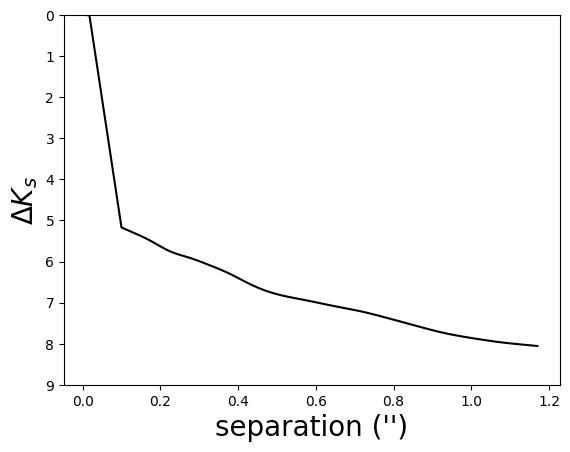

In [10]:
cc = pd.read_csv(contrastcurve_file,header=None)
sep, dmag = cc[0].values, cc[1].values

plt.plot(sep, dmag, 'k-');
plt.ylim(9,0);
plt.ylabel("$\\Delta K_s$", fontsize=20);
plt.xlabel("separation ('')", fontsize=20);

# Calculating FPP & NFPP

CPU times: user 35 ms, sys: 3.77 ms, total: 38.8 ms
Wall time: 38 ms


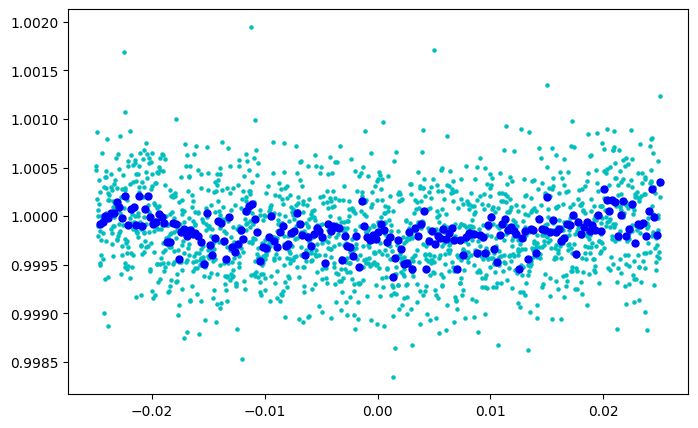

In [7]:
%%time

lc = pd.read_csv(lc_file, header=None)

# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/200
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

plt.scatter(time, flux, s = 5, c = 'c')
plt.scatter(lc.time.value, lc.flux.value, s = 25,  c = 'b')
fig=plt.gcf()
fig.set_size_inches(8,5)

In [8]:
%%time
FPP=np.zeros(15)
NFPP = np.zeros(15)
for i in range(15):
    target.calc_probs(time = lc.time.value, 
                      flux_0 = lc.flux.value, 
                      flux_err_0 = np.mean(lc.flux_err.value), 
                      P_orb = P_orb,
                      contrast_curve_file = contrastcurve_file,
                      filt = band,
                      exptime = 0.0013888888888889,
                      parallel = True)

    print("FPP = ", target.FPP)
    print("NFPP = ", target.NFPP)
    FPP[i]=target.FPP
    NFPP[i] =target.NFPP 


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating TP scenario probabilitiey for 114018671.
Calculating EB and EBx2P scenario probabilities for 114018671.
Calculating PTP scenario probability for 114018671.
Calculating PEB and PEBx2P scenario probabilities for 114018671.
Calculating STP scenario probability for 114018671.
Calculating SEB and SEBx2P scenario probabilities for 114018671.
Calculating DTP scenario probability for 114018671.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating DEB and DEBx2P scenario probabilities for 114018671.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating BTP scenario probability for 114018671.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating BEB and BEBx2P scenario probabilities for 114018671.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]
/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:129: RuntimeWarning: overflow encountered in power
  fluxes = 10**flux_spline(Masses)
/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 774050406.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018662.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 774050390.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 774050407.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018660.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 774050408.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018679.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018670.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018700.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018647.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018706.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018658.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018680.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018699.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018687.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018644.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018638.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018712.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018727.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018726.
FPP =  0.0014316733297461415
NFPP =  1.5502529599053757e-05


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating TP scenario probabilitiey for 114018671.
Calculating EB and EBx2P scenario probabilities for 114018671.
Calculating PTP scenario probability for 114018671.
Calculating PEB and PEBx2P scenario probabilities for 114018671.
Calculating STP scenario probability for 114018671.
Calculating SEB and SEBx2P scenario probabilities for 114018671.
Calculating DTP scenario probability for 114018671.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating DEB and DEBx2P scenario probabilities for 114018671.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating BTP scenario probability for 114018671.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating BEB and BEBx2P scenario probabilities for 114018671.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]
/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 774050406.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018662.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 774050390.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 774050407.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018660.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 774050408.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018679.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018670.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018700.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018647.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018706.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018658.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018680.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018699.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018687.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018644.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018638.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018712.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018727.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018726.
FPP =  0.0013867498211005413
NFPP =  1.749821598704633e-05


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating TP scenario probabilitiey for 114018671.
Calculating EB and EBx2P scenario probabilities for 114018671.
Calculating PTP scenario probability for 114018671.
Calculating PEB and PEBx2P scenario probabilities for 114018671.
Calculating STP scenario probability for 114018671.
Calculating SEB and SEBx2P scenario probabilities for 114018671.
Calculating DTP scenario probability for 114018671.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating DEB and DEBx2P scenario probabilities for 114018671.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating BTP scenario probability for 114018671.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating BEB and BEBx2P scenario probabilities for 114018671.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]
/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 774050406.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018662.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 774050390.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 774050407.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018660.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 774050408.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018679.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018670.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018700.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018647.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018706.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018658.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018680.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018699.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018687.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018644.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018638.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018712.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018727.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018726.
FPP =  0.0008854473316812772
NFPP =  1.675605288531135e-05


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating TP scenario probabilitiey for 114018671.
Calculating EB and EBx2P scenario probabilities for 114018671.
Calculating PTP scenario probability for 114018671.
Calculating PEB and PEBx2P scenario probabilities for 114018671.
Calculating STP scenario probability for 114018671.
Calculating SEB and SEBx2P scenario probabilities for 114018671.
Calculating DTP scenario probability for 114018671.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating DEB and DEBx2P scenario probabilities for 114018671.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating BTP scenario probability for 114018671.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating BEB and BEBx2P scenario probabilities for 114018671.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]
/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:129: RuntimeWarning: overflow encountered in power
  fluxes = 10**flux_spline(Masses)
/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 774050406.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018662.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 774050390.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 774050407.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018660.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 774050408.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018679.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018670.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018700.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018647.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018706.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018658.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018680.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018699.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018687.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018644.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018638.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018712.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018727.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 114018726.
FPP =  0.0012472901398687952
NFPP =  1.5084170603916932e-05


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating TP scenario probabilitiey for 114018671.
Calculating EB and EBx2P scenario probabilities for 114018671.
Calculating PTP scenario probability for 114018671.
Calculating PEB and PEBx2P scenario probabilities for 114018671.
Calculating STP scenario probability for 114018671.
Calculating SEB and SEBx2P scenario probabilities for 114018671.
Calculating DTP scenario probability for 114018671.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating DEB and DEBx2P scenario probabilities for 114018671.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating BTP scenario probability for 114018671.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating BEB and BEBx2P scenario probabilities for 114018671.


/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]
/home/cminds/miniconda3/lib/python3.9/site-packages/triceratops/funcs.py:129: RuntimeWarning: overflow encountered in power
  fluxes = 10**flux_spline(Masses)


HTTPError: HTTP Error 404: Not Found

In [9]:
print("Mean FPP = ",np.round(np.mean(FPP),8))
print("Standard Deviation FPP = ",np.round(np.std(FPP),8))
print("Mean NFPP = ",np.round(np.mean(NFPP),8))
print("Standard Deviation NFPP = ",np.round(np.std(NFPP),8)) 

Mean FPP =  0.00033008
Standard Deviation FPP =  0.00055846
Mean NFPP =  4.32e-06
Standard Deviation NFPP =  7.19e-06


In [14]:
NFPP

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
FPP

array([0.00131857, 0.00144647, 0.0011274 , 0.00131082, 0.00158407,
       0.00151642, 0.00199536, 0.00115747, 0.00138665, 0.00126993,
       0.00161828, 0.00109179, 0.00158522, 0.00110998, 0.00106734])

In [16]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  0.0010673446561403344
NFPP =  0.0


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,114018671,TP,0.940000,0.941335,2.470495,83.337498,0.425061,0.728171,2.060924,1.456903,0.000000,0.000000,5.077364e-01
1,114018671,EB,0.940000,0.941335,2.470495,74.827187,1.703646,0.365354,59.503503,0.000000,0.826780,0.853156,4.094528e-51
2,114018671,EBx2P,0.940000,0.941335,4.940990,84.954289,1.248157,0.449828,193.745163,0.000000,0.899363,0.936514,3.997247e-16
3,114018671,PTP,0.940000,0.941335,2.470495,81.493334,0.508172,0.714750,11.254925,1.464890,0.000000,0.000000,8.926019e-03
4,114018671,PEB,0.940000,0.941335,2.470495,77.954438,1.817761,0.133916,65.296047,0.000000,0.865600,0.894872,7.599366e-38
5,114018671,PEBx2P,0.940000,0.941335,4.940990,85.535732,0.815430,0.637280,188.928452,0.000000,0.901257,0.938991,5.861292e-16
6,114018671,STP,0.901614,0.939459,2.470495,87.997159,0.096133,0.758761,16.843185,2.189057,0.000000,0.000000,1.041818e-03
7,114018671,SEB,0.147093,0.178470,2.470495,88.050399,0.779993,0.305402,192.385986,0.000000,0.017786,0.100000,1.034810e-05
8,114018671,SEBx2P,0.193607,0.224153,4.940990,88.081029,1.107152,0.308980,164.311920,0.000000,0.190979,0.221734,1.489012e-05
9,114018671,DTP,0.940000,0.941335,2.470495,78.669321,0.949177,0.558603,14.478592,1.547387,0.000000,0.000000,4.822703e-01


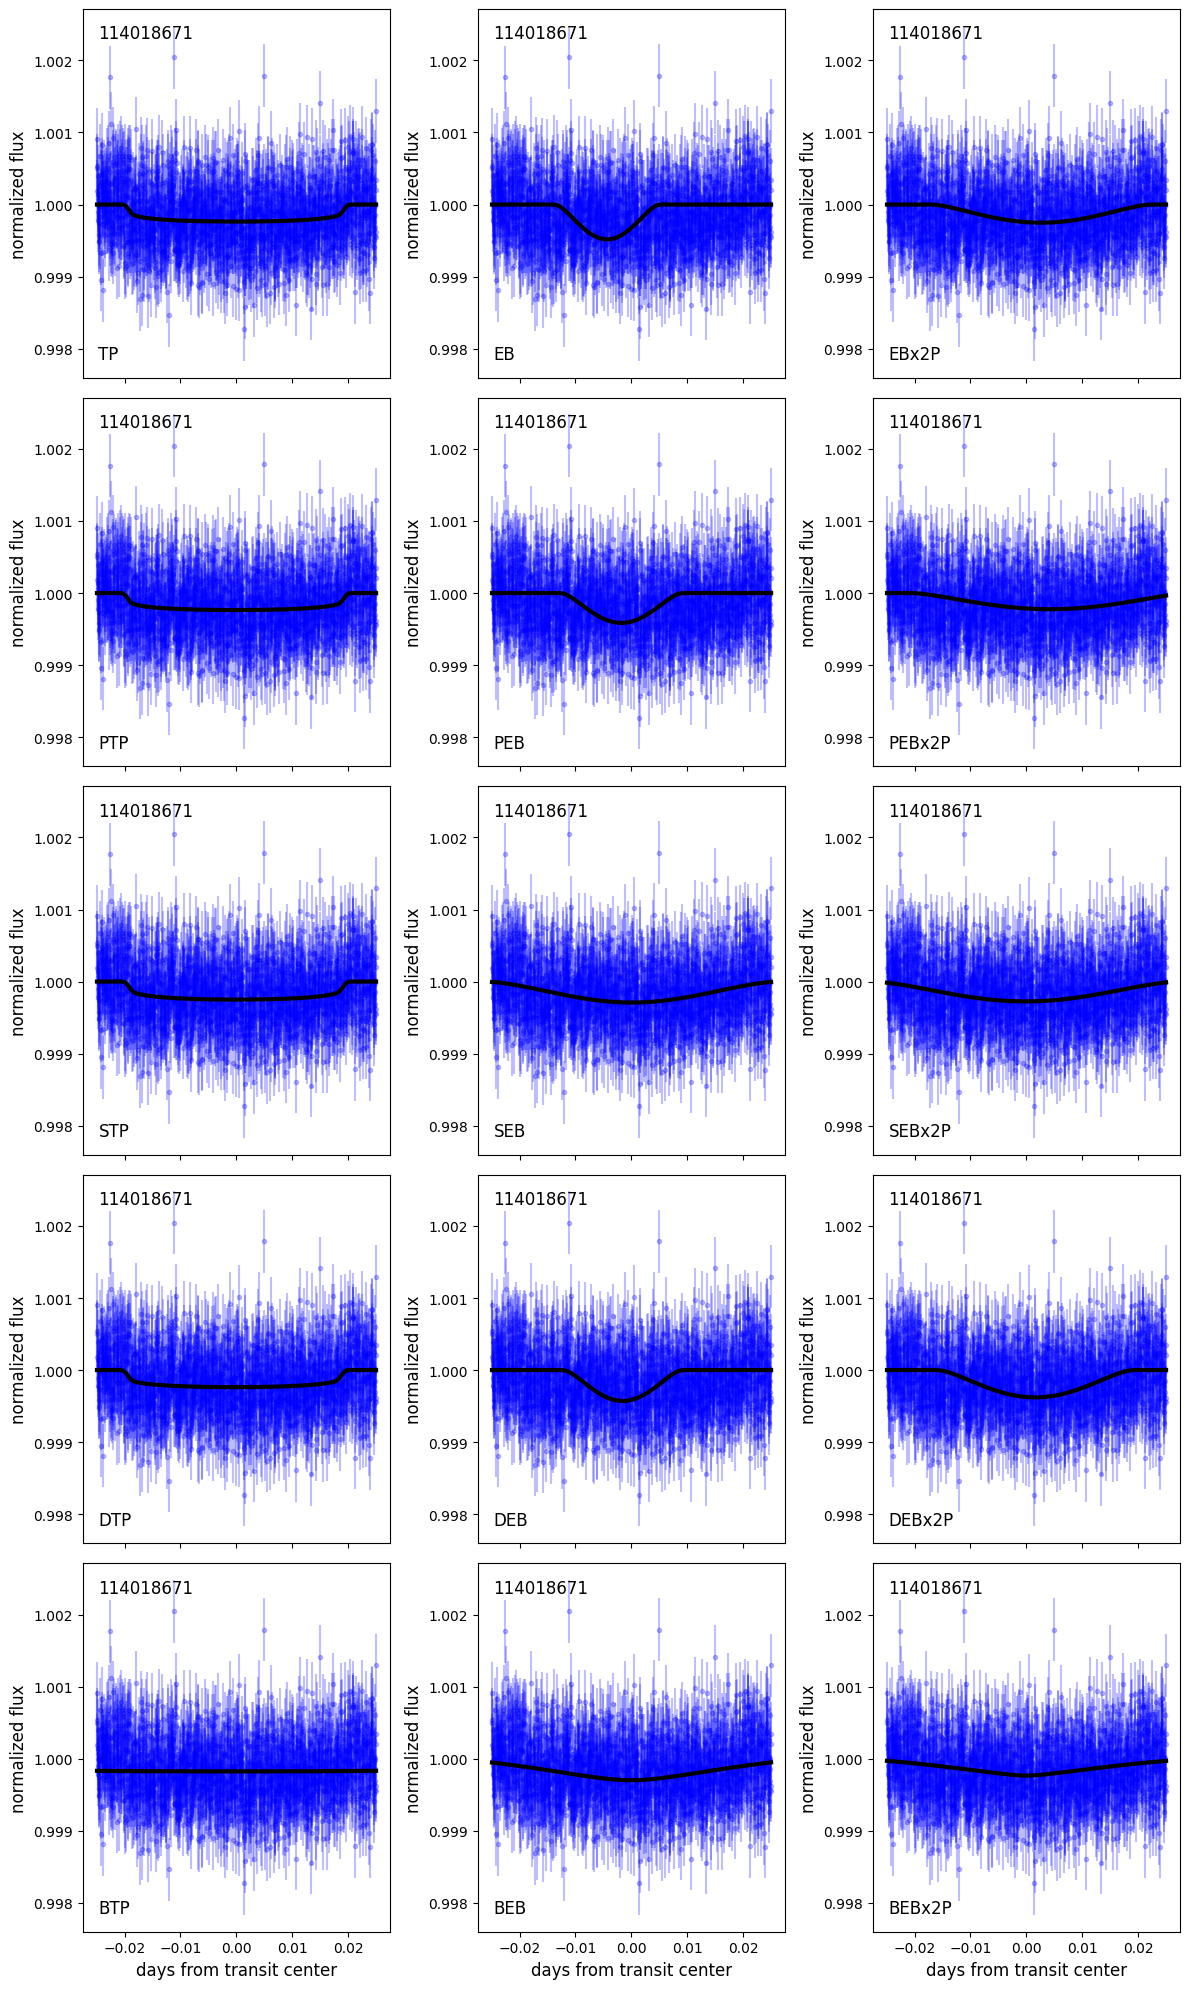

In [17]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))

In [18]:
# 562

print("Mean FPP = ",np.round(np.mean(FPP),8))
print("Standard Deviation FPP = ",np.round(np.std(FPP),8))

Mean FPP =  0.00137238
Standard Deviation FPP =  0.00024888
